## Instructions (I):
With your group mates, open the file in file_for_project/fifa21_training.csv. The objective is to create the best linear model to predict the column OVR.

1.
Each member of the team should have his/her own juypter notebook. In addition, each group should have a group jupyter notebook.

2.
Decide which columns can be predictive and which ones can be directly dropped and take the need actions.

3.
Decide among the members of the group who is going to take care of inspecting the remaining columns of the dataset. For example: Member 1: cols 1 -> 5 Member 2: cols 6 -> 10 … and so on

3.
Each member must do:

Explore their assigned columns and write python code to perform any cleanup operation that the assigned columns may need.

Perform any scaling operation that the assigned column may need.

4.
Put all the code of each member into the group jupyter notebook.

## Instructions (II):
During this afternoon session, each member of the group must write a function which:

takes a dataframe as input
perform the data cleaning operations on the assigned columns
return a new cleaned dataframe.
Then put all you group member functions into the group jupyter notebook.

BONUS
Try to create a new function called preprocess which"

takes a dataframeas input
call all the other group member functions and apply them to the starting dataframe
return a clean dataframe.

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import math

In [141]:
from sklearn import preprocessing

In [142]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

## 01 - Problem (case study): Data Description + Goal ##

Case Study: Predict FIFA 21 OVA based on given data 

## 02 - Getting Data: Read the .csv file ##

In [143]:
data = pd.read_csv('fifa21_trainning.csv')

In [144]:
data.head(5)

,Unnamed: 0,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,1954,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,Right,1,"Jul 1, 2015",NaN,€525K,€4K,€801K,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4 ★,2★,High,Medium,1 ★,69,51,63,63,51,60,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,2225,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,Right,0,"Jan 16, 2015","Dec 31, 2020",€8.5M,€23K,€0,"Dec 31, 2020 On Loan",365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3 ★,4★,High,Low,2 ★,83,75,68,82,33,71,44,77+0,77+0,77+0,77+0,77+0,77+0,77+0,77+0,76+1,76+1,76+1,76+1,68+2,68+2,68+2,76+1,57+2,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,1959,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",134lbs,Right,0,"Jan 31, 2019",NaN,€9M,€49K,€15.3M,2019 ~ 2022,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4 ★,4★,High,Medium,2 ★,80,77,78,86,27,56,73,73+2,73+2,73+2,80+0,79+0,79+0,79+0,80+0,80+0,80+0,80+0,79+1,74+2,74+2,74+2,79+1,59+2,56+2,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,9815,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",152lbs,Right,13,"Jul 1, 2016",NaN,€275K,€4K,€694K,2016 ~ 2021,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2 ★,2★,Medium,Medium,1 ★,57,44,54,57,57,60,7,50+2,50+2,50+2,51+0,51+0,51+0,51+0,51+0,53+2,53+2,53+2,53+2,56+2,56+2,56+2,53+2,56+2,58+2,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,10074,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",150lbs,Right,8,"Jul 1, 2018",NaN,€725K,€2K,€1.4M,2018 ~ 2021,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2 ★,3★,Low,Medium,1 ★,66,44,60,64,60,66,4,56+2,56+2,56+2,59+0,59+0,59+0,59+0,59+0,61+2,61+2,61+2,62+2,63+2,63+2,63+2,62+2,64+2,64+2,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65


In [145]:
#len(data['id'].unique())

In [146]:
#standardize column headers
#lowercase and underscore
data.columns = [val.lower().replace(' ','_') for val in data.columns]
print(data.columns)

Index(['unnamed:_0', 'id', 'name', 'age', 'nationality', 'club', 'bp',
       'position', 'team_&_contract', 'height',
       ...
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk', 'ova'],
      dtype='object', length=102)


In [147]:
data = data.drop(['id'], axis = 1)

In [148]:
data = data.drop(['unnamed:_0'], axis = 1)

In [149]:
data.head(5)

,name,age,nationality,club,bp,position,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,Right,1,"Jul 1, 2015",NaN,€525K,€4K,€801K,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4 ★,2★,High,Medium,1 ★,69,51,63,63,51,60,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,Right,0,"Jan 16, 2015","Dec 31, 2020",€8.5M,€23K,€0,"Dec 31, 2020 On Loan",365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3 ★,4★,High,Low,2 ★,83,75,68,82,33,71,44,77+0,77+0,77+0,77+0,77+0,77+0,77+0,77+0,76+1,76+1,76+1,76+1,68+2,68+2,68+2,76+1,57+2,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",134lbs,Right,0,"Jan 31, 2019",NaN,€9M,€49K,€15.3M,2019 ~ 2022,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4 ★,4★,High,Medium,2 ★,80,77,78,86,27,56,73,73+2,73+2,73+2,80+0,79+0,79+0,79+0,80+0,80+0,80+0,80+0,79+1,74+2,74+2,74+2,79+1,59+2,56+2,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",152lbs,Right,13,"Jul 1, 2016",NaN,€275K,€4K,€694K,2016 ~ 2021,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2 ★,2★,Medium,Medium,1 ★,57,44,54,57,57,60,7,50+2,50+2,50+2,51+0,51+0,51+0,51+0,51+0,53+2,53+2,53+2,53+2,56+2,56+2,56+2,53+2,56+2,58+2,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",150lbs,Right,8,"Jul 1, 2018",NaN,€725K,€2K,€1.4M,2018 ~ 2021,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2 ★,3★,Low,Medium,1 ★,66,44,60,64,60,66,4,56+2,56+2,56+2,59+0,59+0,59+0,59+0,59+0,61+2,61+2,61+2,62+2,63+2,63+2,63+2,62+2,64+2,64+2,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65


In [150]:
len(data['club'].unique())

898

In [151]:
data.shape

(13700, 100)

In [152]:
#some duplicated names, we will not remove names
len(data['name'].unique())

13064

## Check Datatypes

In [153]:
#everything looks correct according to the data type, did not change
data.dtypes

name                 object
age                   int64
nationality          object
club                 object
bp                   object
position             object
team_&_contract      object
height               object
weight               object
foot                 object
growth                int64
joined               object
loan_date_end        object
value                object
wage                 object
release_clause       object
contract             object
attacking             int64
crossing              int64
finishing             int64
heading_accuracy      int64
short_passing         int64
volleys             float64
skill                 int64
dribbling             int64
curve               float64
fk_accuracy           int64
long_passing          int64
ball_control          int64
movement              int64
acceleration          int64
sprint_speed          int64
agility             float64
reactions             int64
balance             float64
power               

In [154]:
data.shape

(13700, 100)

## Check for unique values colunn

In [155]:
#use this on split columns later
#we will split data and run it through this function in order to remove the unique value columns
#data1 = data.iloc[:,0:4]

#def check_unique (df):
 #   for val in df.columns:
 #       if (len(data[val].unique())) == len(data[val]):
 #           df.drop([val], axis = 1)
  #  return df

#print(check_unique(data1))
#print(check_unique(data(data.columns[3]))) 

## Check Duplicates

In [156]:
data.shape

(13700, 100)

In [157]:
#after removing duplicates: No duplicates were found
data = data.drop_duplicates()
data.shape

(13700, 100)

In [158]:
data.shape

(13700, 100)

### Deal with NaN values #

In [159]:
data.isna().sum()

name                    0
age                     0
nationality             0
club                   21
bp                      0
position              343
team_&_contract         0
height                  0
weight                  0
foot                    0
growth                  0
joined                 44
loan_date_end       12961
value                   0
wage                    0
release_clause          0
contract                0
attacking               0
crossing                0
finishing               0
heading_accuracy        0
short_passing           0
volleys                44
skill                   0
dribbling               0
curve                  44
fk_accuracy             0
long_passing            0
ball_control            0
movement                0
acceleration            0
sprint_speed            0
agility                44
reactions               0
balance                44
power                   0
shot_power              0
jumping                44
stamina     

In [160]:
round(data.isna().sum()/len(data),4) * 100  # shows the percentage of null values in a column

name                 0.00
age                  0.00
nationality          0.00
club                 0.15
bp                   0.00
position             2.50
team_&_contract      0.00
height               0.00
weight               0.00
foot                 0.00
growth               0.00
joined               0.32
loan_date_end       94.61
value                0.00
wage                 0.00
release_clause       0.00
contract             0.00
attacking            0.00
crossing             0.00
finishing            0.00
heading_accuracy     0.00
short_passing        0.00
volleys              0.32
skill                0.00
dribbling            0.00
curve                0.32
fk_accuracy          0.00
long_passing         0.00
ball_control         0.00
movement             0.00
acceleration         0.00
sprint_speed         0.00
agility              0.32
reactions            0.00
balance              0.32
power                0.00
shot_power           0.00
jumping              0.32
stamina     

In [161]:
#we need to drop loan_date_end because it has 95% missing values
data = data.drop(['loan_date_end'], axis=1)

In [162]:
#drop NaNs
data=data.dropna()

In [163]:
data.shape

(13124, 99)

## Split data into categorical and numerical

In [164]:
X_num = data.select_dtypes(include=np.number)

In [165]:
X_cat = data.select_dtypes(include=np.object)

In [166]:
X_num.columns

Index(['age', 'growth', 'attacking', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'skill', 'dribbling',
       'curve', 'fk_accuracy', 'long_passing', 'ball_control', 'movement',
       'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance',
       'power', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'mentality', 'aggression', 'interceptions', 'positioning', 'vision',
       'penalties', 'composure', 'defending', 'marking', 'standing_tackle',
       'sliding_tackle', 'goalkeeping', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes', 'total_stats',
       'base_stats', 'pac', 'sho', 'pas', 'dri', 'def', 'phy', 'ova'],
      dtype='object')

In [167]:
len(X_num.columns)

52

## Split data further into individual group work tasks (numerical data into 2 batches)

In [168]:
X_num1 = X_num.iloc[:,0:26]
X_num2 = X_num.iloc[:,26:52]

In [169]:
X_num1.columns

Index(['age', 'growth', 'attacking', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'skill', 'dribbling',
       'curve', 'fk_accuracy', 'long_passing', 'ball_control', 'movement',
       'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance',
       'power', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots'],
      dtype='object')

In [170]:
X_num2.columns

Index(['mentality', 'aggression', 'interceptions', 'positioning', 'vision',
       'penalties', 'composure', 'defending', 'marking', 'standing_tackle',
       'sliding_tackle', 'goalkeeping', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes', 'total_stats',
       'base_stats', 'pac', 'sho', 'pas', 'dri', 'def', 'phy', 'ova'],
      dtype='object')

In [171]:
#for val in X_num1.columns:
#    sns.distplot(X_num1[val])
#    plt.show()

## our findings on assumption of normalized data:

In [172]:
#we applies box cox - did not work because of some of the column values are negative
#we applied manual log transformation - it skewed our data more than original
#we have better original data by considering the assumption of normalized data

In [173]:
#checking if they looks the same as before
#for val in X_num1.columns:
#    sns.distplot(X_num1[val])
#    plt.show()

In [174]:
#for val in X_num1:
 ##   sns.boxplot(x=X_num1[val])
#sns.boxplot(x=[],data=data)
 #   plt.show()

In [175]:
#now we apply heatmap to check multicollinearity of X_num1 numerical columns

In [176]:
#correlations_matrix = X_num1.corr()
#mask = np.zeros_like(correlations_matrix)
#mask[np.triu_indices_from(mask)] = True
#fig, ax = plt.subplots(figsize=(25, 10))
#ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
#plt.show()

In [177]:
#takeaways from the heatmaps: we will remove age,dribbling, curve,fk_accuracy,long_passing, ball_control, long_shots, movement, sprint_speed, agility, balance

In [178]:
#strong_correlation = ([age,growth],[skill,dribbling],[skill,curve],[skill, fk_accuracy],[skill,long_passing],[skill,ball_control],[dribbling,ball_control],[movement,accelaration],[movement,agility],[acceleration,sprint_speed],[acceleration,agility])

In [179]:
dropping_columns1 = ['age','dribbling','curve','fk_accuracy','long_passing','ball_control','long_shots','movement','sprint_speed','agility','balance']

In [180]:
for val in dropping_columns1:
    X_num1 = X_num1.drop([val], axis =1)

In [181]:
X_num1.columns

Index(['growth', 'attacking', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'skill', 'acceleration', 'reactions',
       'power', 'shot_power', 'jumping', 'stamina', 'strength'],
      dtype='object')

### X_num1.head()

In [182]:
#repeat process for batch X_num2

In [183]:
#for val in X_num2.columns:
#    sns.distplot(X_num2[val])
#    plt.show()

In [184]:
#since 'ova' is our target column (Y), we will separate it from our dataset

In [185]:
Y = X_num2['ova']
X_num2 = X_num2.drop(['ova'], axis =1)

In [186]:
X_num2.head(1)

,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,pac,sho,pas,dri,def,phy
0,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,69,51,63,63,51,60


In [187]:
Y.head(3)

0    64
1    77
2    80
Name: ova, dtype: int64

In [188]:
#here we also take the original values and compare with log transformation on each column, the data after normalization does not look better so we take the original distribution

In [189]:
#we cannot try box cox because of negative values

In [190]:
#correlations_matrix = X_num2.corr()
#mask = np.zeros_like(correlations_matrix)
#mask[np.triu_indices_from(mask)] = True
#fig, ax = plt.subplots(figsize=(25, 10))
#ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
#plt.show()

In [191]:
dropping_columns2 = ['aggression','positioning','penalties','total_stats','defending','marking','standing_tackle','sliding_tackle']
dropping_columns2 = set(dropping_columns2)

In [192]:
for val in dropping_columns2:
    X_num2 = X_num2.drop([val], axis =1)

In [193]:
X_num2.columns

Index(['mentality', 'interceptions', 'vision', 'composure', 'goalkeeping',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes', 'base_stats', 'pac', 'sho', 'pas', 'dri', 'def', 'phy'],
      dtype='object')

In [194]:
X_num2.head(3)

,mentality,interceptions,vision,composure,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,base_stats,pac,sho,pas,dri,def,phy
0,290,52.0,68.0,54.0,48,7,12,14,9,6,357,69,51,63,63,51,60
1,313,33.0,72.0,70.0,55,11,7,14,7,16,412,83,75,68,82,33,71
2,332,26.0,78.0,82.0,21,6,3,6,3,3,404,80,77,78,86,27,56


In [195]:
X_num2.shape

(13124, 17)

In [196]:
X_num3 = pd.concat([X_num1, X_num2], axis = 1)

In [197]:
data.head(1)

,name,age,nationality,club,bp,position,team_&_contract,height,weight,foot,growth,joined,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,Right,1,"Jul 1, 2015",€525K,€4K,€801K,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4 ★,2★,High,Medium,1 ★,69,51,63,63,51,60,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64


In [198]:
X_num3.head(3)

,growth,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,acceleration,reactions,power,shot_power,jumping,stamina,strength,mentality,interceptions,vision,composure,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,base_stats,pac,sho,pas,dri,def,phy
0,1,258,54,47,43,70,44.0,286,64,66,306,62,73.0,71,55,290,52.0,68.0,54.0,48,7,12,14,9,6,357,69,51,63,63,51,60
1,0,365,66,79,76,68,76.0,375,83,75,372,74,81.0,75,74,313,33.0,72.0,70.0,55,11,7,14,7,16,412,83,75,68,82,33,71
2,0,336,73,76,34,78,75.0,424,84,78,308,79,34.0,75,42,332,26.0,78.0,82.0,21,6,3,6,3,3,404,80,77,78,86,27,56


In [199]:
#for val in X_num3.columns:
#    sns.distplot(X_num3[val])
 #   plt.show()

### Categorical Features #

In [200]:
#dealing with strange string columns with + figures >> converted into numerical columns and added up numbers

In [201]:
X_cat.shape

(13124, 47)

In [202]:
def my_nice_figures(x):
    x = x.split('+')
    return int(x[0]) + int(x[1])

print(my_nice_figures('65+0'))

65


In [203]:
X_cat1 = X_cat.iloc[:,20:47]
    

In [204]:
X_cat1.head(1)

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1


In [205]:
# awesome way of adding up column numbers quickly
for val in X_cat1.columns:
    X_cat1[val] = list(map(my_nice_figures, X_cat1[val]))

In [206]:
X_cat1.dtypes

ls     int64
st     int64
rs     int64
lw     int64
lf     int64
cf     int64
rf     int64
rw     int64
lam    int64
cam    int64
ram    int64
lm     int64
lcm    int64
cm     int64
rcm    int64
rm     int64
lwb    int64
ldm    int64
cdm    int64
rdm    int64
rwb    int64
lb     int64
lcb    int64
cb     int64
rcb    int64
rb     int64
gk     int64
dtype: object

In [207]:
X_cat1.head(3)

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,59,59,59,61,62,62,62,61,64,64,64,64,64,64,64,64,60,60,60,60,60,59,55,55,55,59,16
1,77,77,77,77,77,77,77,77,77,77,77,77,70,70,70,77,59,55,55,55,59,55,50,50,50,55,20
2,75,75,75,80,79,79,79,80,80,80,80,80,76,76,76,80,61,58,58,58,61,55,43,43,43,55,14


In [208]:
#correlations_matrix = X_cat1.corr()
#mask = np.zeros_like(correlations_matrix)
#mask[np.triu_indices_from(mask)] = True
#fig, ax = plt.subplots(figsize=(25, 10))
#ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
#plt.show()

In [209]:
dropping_columns3 = ('rm','st','rs','lw','lf','rm','rcm','cm','lcm','lm','ram','cam','lam','rw','rf','cf','lf','lw','rs','st')
dropping_columns3 = set(dropping_columns3)

In [210]:
for val in dropping_columns3:
    X_cat1 = X_cat1.drop([val], axis =1)

In [211]:
X_cat1.head(1)

,ls,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,59,60,60,60,60,60,59,55,55,55,59,16


In [212]:
#distribution of new numerical columns
#for val in X_cat1.columns:
 #   sns.distplot(X_cat1[val])
  #  plt.show()

In [213]:
#adding the new numerical columns to our main numerical dataset

In [214]:
X_num3 = pd.concat([X_num3,X_cat1], axis = 1)

In [215]:
X_num3.columns

Index(['growth', 'attacking', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'skill', 'acceleration', 'reactions',
       'power', 'shot_power', 'jumping', 'stamina', 'strength', 'mentality',
       'interceptions', 'vision', 'composure', 'goalkeeping', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes',
       'base_stats', 'pac', 'sho', 'pas', 'dri', 'def', 'phy', 'ls', 'lwb',
       'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk'],
      dtype='object')

In [216]:
#correlations_matrix = X_num3.corr()
#mask = np.zeros_like(correlations_matrix)
#mask[np.triu_indices_from(mask)] = True
#fig, ax = plt.subplots(figsize=(25, 10))
#ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
#plt.show()

In [217]:
dropping_columns4 = ['ls','goalkeeping','gk_diving','gk_handling','gk_kicking','gk_positioning','gk_reflexes',
                     'lwb','ldm','cdm','rwb','lb','cb','rcb','rb']
dropping_columns4 = set(dropping_columns4)

In [218]:
for val in dropping_columns4:
    X_num3 = X_num3.drop([val], axis =1)

In [219]:
X_num3.shape

(13124, 29)

In [220]:
#X_num3.dtypes

In [221]:
#checking 1 more time
#correlations_matrix = X_num3.corr()
#mask = np.zeros_like(correlations_matrix)
#mask[np.triu_indices_from(mask)] = True
#fig, ax = plt.subplots(figsize=(25, 10))
#ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
#plt.show()

In [222]:
dropping_columns5 = ['phy','rdm','interceptions','attacking','short_passing']

In [223]:
for val in dropping_columns5:
    X_num3 = X_num3.drop([val], axis =1)

In [224]:
X_num3.shape

(13124, 24)

### now working on actual categoricals

In [225]:
X_cat.head(3)

,name,nationality,club,bp,position,team_&_contract,height,weight,foot,joined,value,wage,release_clause,contract,w/f,sm,a/w,d/w,ir,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,A. Pasche,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,Right,"Jul 1, 2015",€525K,€4K,€801K,2015 ~ 2020,4 ★,2★,High,Medium,1 ★,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1
1,Alan Carvalho,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,Right,"Jan 16, 2015",€8.5M,€23K,€0,"Dec 31, 2020 On Loan",3 ★,4★,High,Low,2 ★,44,77+0,77+0,77+0,77+0,77+0,77+0,77+0,77+0,76+1,76+1,76+1,76+1,68+2,68+2,68+2,76+1,57+2,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2
2,S. Giovinco,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",134lbs,Right,"Jan 31, 2019",€9M,€49K,€15.3M,2019 ~ 2022,4 ★,4★,High,Medium,2 ★,73,73+2,73+2,73+2,80+0,79+0,79+0,79+0,80+0,80+0,80+0,80+0,79+1,74+2,74+2,74+2,79+1,59+2,56+2,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2


In [226]:
X_cat2 = X_cat.iloc[:,0:20]

In [227]:
X_cat2.head(0)

,name,nationality,club,bp,position,team_&_contract,height,weight,foot,joined,value,wage,release_clause,contract,w/f,sm,a/w,d/w,ir,hits


In [228]:
X_cat.head(1)

,name,nationality,club,bp,position,team_&_contract,height,weight,foot,joined,value,wage,release_clause,contract,w/f,sm,a/w,d/w,ir,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,A. Pasche,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,Right,"Jul 1, 2015",€525K,€4K,€801K,2015 ~ 2020,4 ★,2★,High,Medium,1 ★,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1


In [229]:
X_cat2.head(0)

,name,nationality,club,bp,position,team_&_contract,height,weight,foot,joined,value,wage,release_clause,contract,w/f,sm,a/w,d/w,ir,hits


In [230]:
X_cat2['team_&_contract'].nunique()

8059

In [231]:
X_cat2 = X_cat2.drop(['team_&_contract'], axis = 1)

In [232]:
X_cat2.columns

Index(['name', 'nationality', 'club', 'bp', 'position', 'height', 'weight',
       'foot', 'joined', 'value', 'wage', 'release_clause', 'contract', 'w/f',
       'sm', 'a/w', 'd/w', 'ir', 'hits'],
      dtype='object')

In [233]:
#distribution of categorical column values
#for val in X_cat2.columns:  
#sns.boxplot(x = X_cat2['team_&_contract'], y = Y)
#plt.show()

In [234]:
X_cat2['position'].nunique()  #.value_counts()

573

In [235]:
X_cat2 = X_cat2.drop(['nationality','name'], axis = 1)

In [236]:
X_cat2.columns

Index(['club', 'bp', 'position', 'height', 'weight', 'foot', 'joined', 'value',
       'wage', 'release_clause', 'contract', 'w/f', 'sm', 'a/w', 'd/w', 'ir',
       'hits'],
      dtype='object')

In [237]:
X_cat2 = X_cat2.drop(['club'], axis = 1)

In [238]:
X_cat2.columns

Index(['bp', 'position', 'height', 'weight', 'foot', 'joined', 'value', 'wage',
       'release_clause', 'contract', 'w/f', 'sm', 'a/w', 'd/w', 'ir', 'hits'],
      dtype='object')

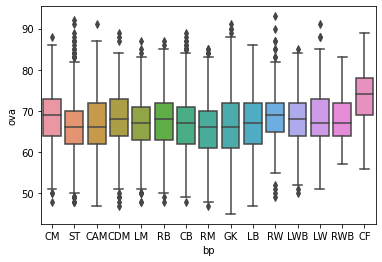

In [239]:
sns.boxplot(x = X_cat2['bp'], y = Y)
plt.show()

In [240]:
#X_cat2 = X_cat2.drop(['team_&_contract','contract'], axis = 1)

In [241]:
X_cat2.columns

Index(['bp', 'position', 'height', 'weight', 'foot', 'joined', 'value', 'wage',
       'release_clause', 'contract', 'w/f', 'sm', 'a/w', 'd/w', 'ir', 'hits'],
      dtype='object')

In [242]:
X_cat2 = X_cat2.drop(['position'], axis = 1)

In [243]:
X_cat2 = X_cat2.drop(['height','weight'], axis = 1)

In [244]:
X_cat2.columns

Index(['bp', 'foot', 'joined', 'value', 'wage', 'release_clause', 'contract',
       'w/f', 'sm', 'a/w', 'd/w', 'ir', 'hits'],
      dtype='object')

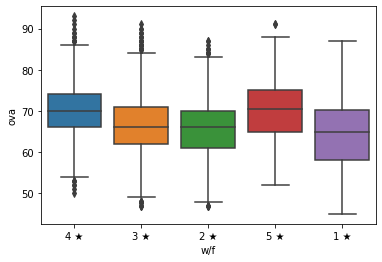

In [245]:
sns.boxplot(x = X_cat2['w/f'], y = Y)
plt.show()

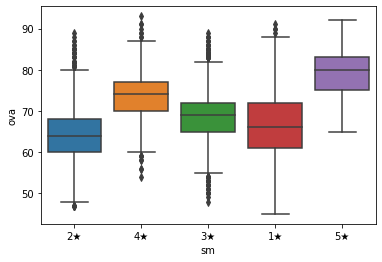

In [246]:
sns.boxplot(x = X_cat2['sm'], y = Y)
plt.show()

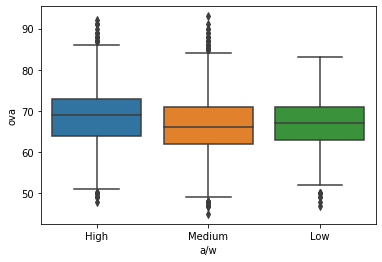

In [247]:
sns.boxplot(x = X_cat2['a/w'], y = Y)
plt.show()

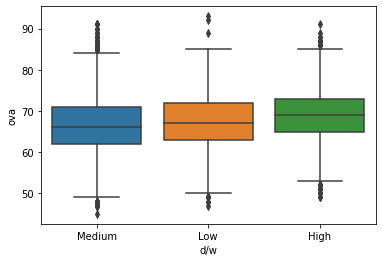

In [248]:
sns.boxplot(x = X_cat2['d/w'], y = Y)
plt.show()

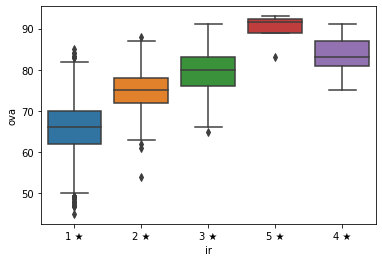

In [249]:
sns.boxplot(x = X_cat2['ir'], y = Y)
plt.show()



In [250]:
X_cat2 = X_cat2.drop(['a/w','d/w'], axis = 1)

In [251]:
X_cat2.columns

Index(['bp', 'foot', 'joined', 'value', 'wage', 'release_clause', 'contract',
       'w/f', 'sm', 'ir', 'hits'],
      dtype='object')

In [252]:
X_cat2.shape

(13124, 11)

In [253]:
X_cat2.columns

Index(['bp', 'foot', 'joined', 'value', 'wage', 'release_clause', 'contract',
       'w/f', 'sm', 'ir', 'hits'],
      dtype='object')

In [254]:
# checking unique categorical values separately so that we can standardize properly

In [255]:
#for val in X_cat2.columns:
#    print(X_cat2[val].nunique())
    
    
    

In [256]:
X_cat2 = X_cat2.drop(['joined','value','wage','release_clause','contract','hits'], axis = 1)

In [257]:
X_cat2.columns

Index(['bp', 'foot', 'w/f', 'sm', 'ir'], dtype='object')

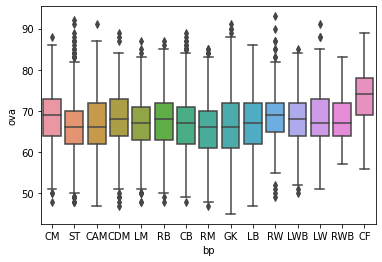

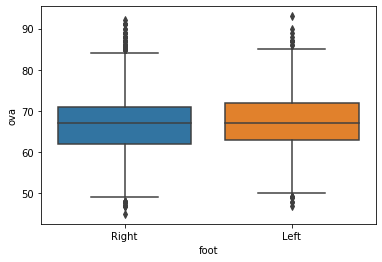

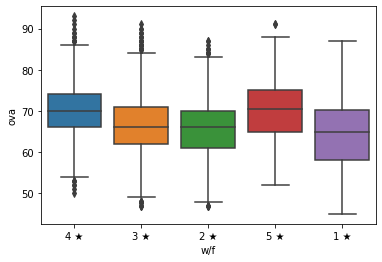

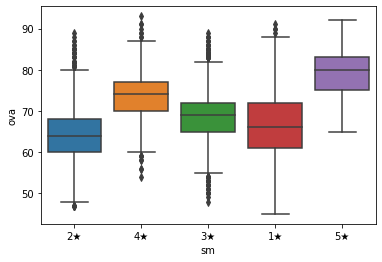

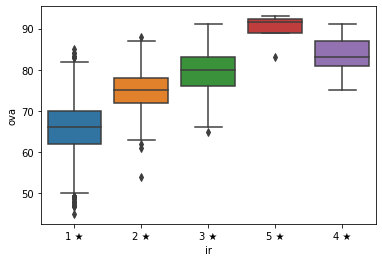

In [258]:
for val in X_cat2.columns:
    sns.boxplot(x = X_cat2[val], y = Y)
    plt.show()

In [259]:
#dropping foot based on X Y comparison

In [260]:
X_cat2 = X_cat2.drop(['foot'], axis = 1)

In [261]:
X_cat2.columns

Index(['bp', 'w/f', 'sm', 'ir'], dtype='object')

In [262]:
from sklearn.preprocessing import OneHotEncoder
one_hot_data = pd.get_dummies(X_cat2, drop_first = True)   # one hot encoding categorical variables
one_hot_data.head(3)

,bp_CB,bp_CDM,bp_CF,bp_CM,bp_GK,bp_LB,bp_LM,bp_LW,bp_LWB,bp_RB,bp_RM,bp_RW,bp_RWB,bp_ST,w/f_2 ★,w/f_3 ★,w/f_4 ★,w/f_5 ★,sm_2★,sm_3★,sm_4★,sm_5★,ir_2 ★,ir_3 ★,ir_4 ★,ir_5 ★
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0


In [263]:
one_hot_data.shape

(13124, 26)

In [264]:
X_num3.shape

(13124, 24)

In [265]:
#concatenating all batches
X = pd.concat([X_num3,one_hot_data], axis = 1)

In [266]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.3, random_state=100) #taking random observations from 70% 
# random state fixed sample

In [267]:
from sklearn.linear_model import LinearRegression 
lm=LinearRegression()    # model
lm.fit(X_train, y_train)   # model train
#predictions=lm.predict(X_test)   # model prediction

LinearRegression()

In [268]:
predictions=lm.predict(X_test) 

In [269]:
print(predictions)

[70.33437103 83.62938835 68.84823277 ... 76.36756269 74.90514554
 72.27268252]


In [270]:
from sklearn.metrics import r2_score, mean_squared_error

In [271]:
rmse = mean_squared_error(y_test, predictions)
print(rmse)

4.465969678239253


In [272]:
r2 = r2_score(y_test, predictions)
r2

0.9073017547614589

In [273]:
n = len(X_test) 
p = X_test.shape[1]

In [274]:
adj_r2 = 1-((1-r2)*(n-1)/(n-p-1))
adj_r2

0.9061093410074257